# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
#import empiricaldist
#import janitor
import matplotlib.pyplot as plt
import numpy as np
#import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
#import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos previamente procesados

In [3]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Utilizando los conjuntos de datos de `seaborn`

In [4]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de colab

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [5]:
preprocess_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [6]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [7]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [8]:
preprocess_penguins_df.shape # Primer numero = filas | Segundo numero = variables

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [9]:
(
    preprocess_penguins_df
    .isnull()
    .any() # Me indica exactamente en cual variable tengo los nulos
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .sum() # Me suma los valores nulos que tengo en cada variable
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .sum() # Me suma los valores nulos que tengo en cada variable
    .sum() # Este segundo sum me totaliza todos los nulos de todas las variables
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

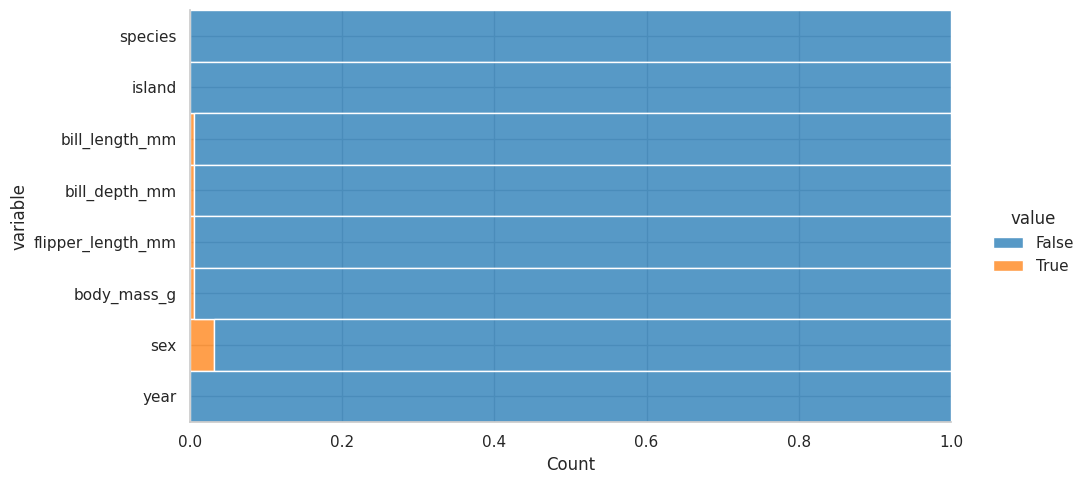

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2 # agranda
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

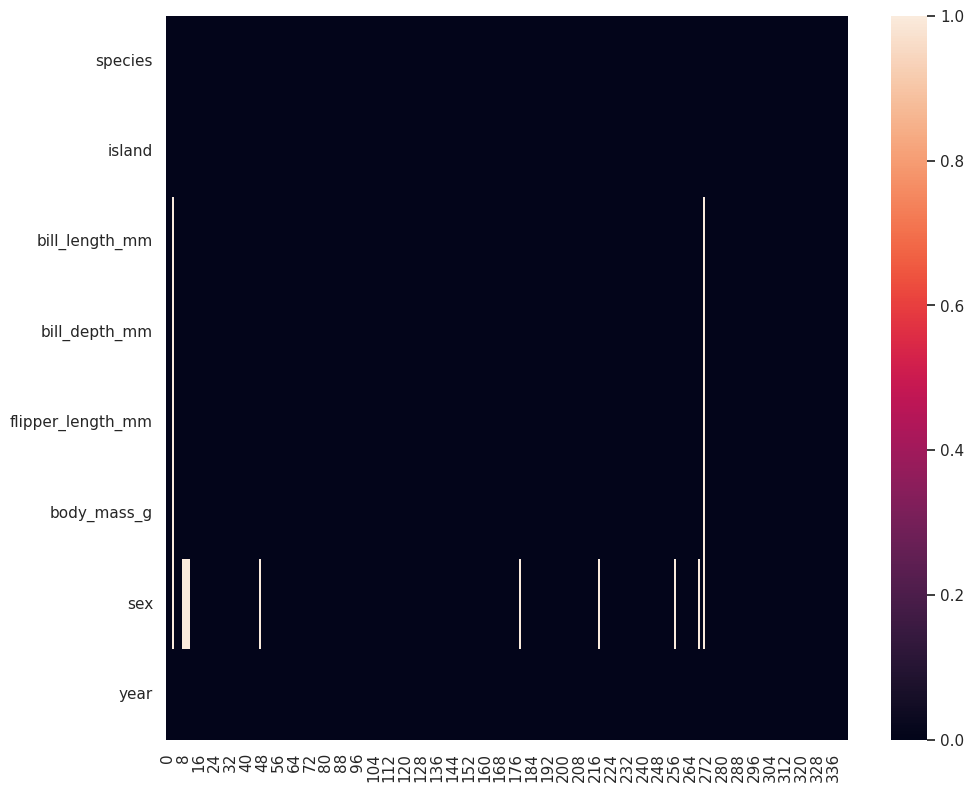

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .transpose() # pivot table
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [14]:
process_penguins = preprocess_penguins_df.dropna()

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [15]:
process_penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [16]:
process_penguins.describe(include=[np.number] )

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [17]:
process_penguins.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [18]:
(
    process_penguins
    .astype({
        'species':'category',
        'island':'category',
        'sex':'category'
    }
    )
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

### Pandas

<Axes: >

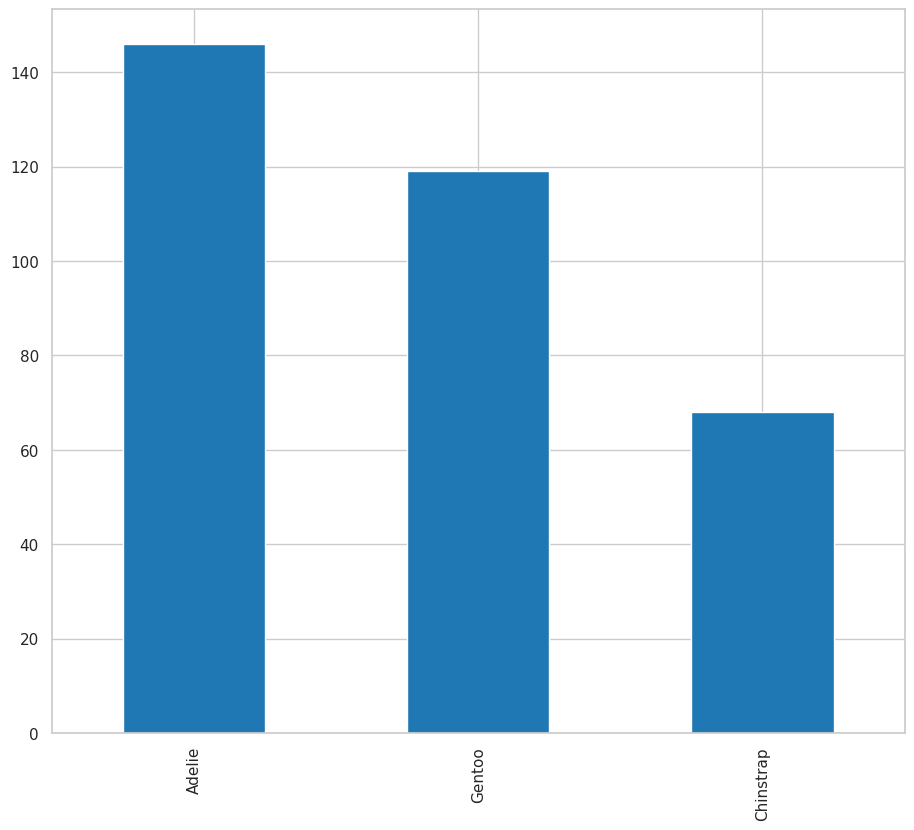

In [19]:
(
    process_penguins
    .species
    .value_counts()
    .plot(kind='bar')
)

### Seaborn

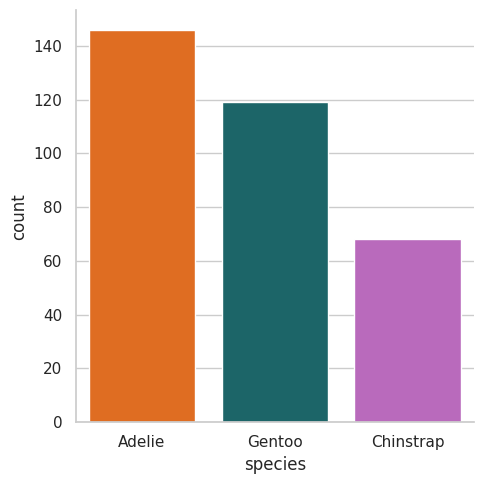

In [20]:
sns.catplot(
    data = process_penguins,
    x = 'species',
    kind = 'count',
    palette = penguin_color
)

<Axes: xlabel='species', ylabel='count'>

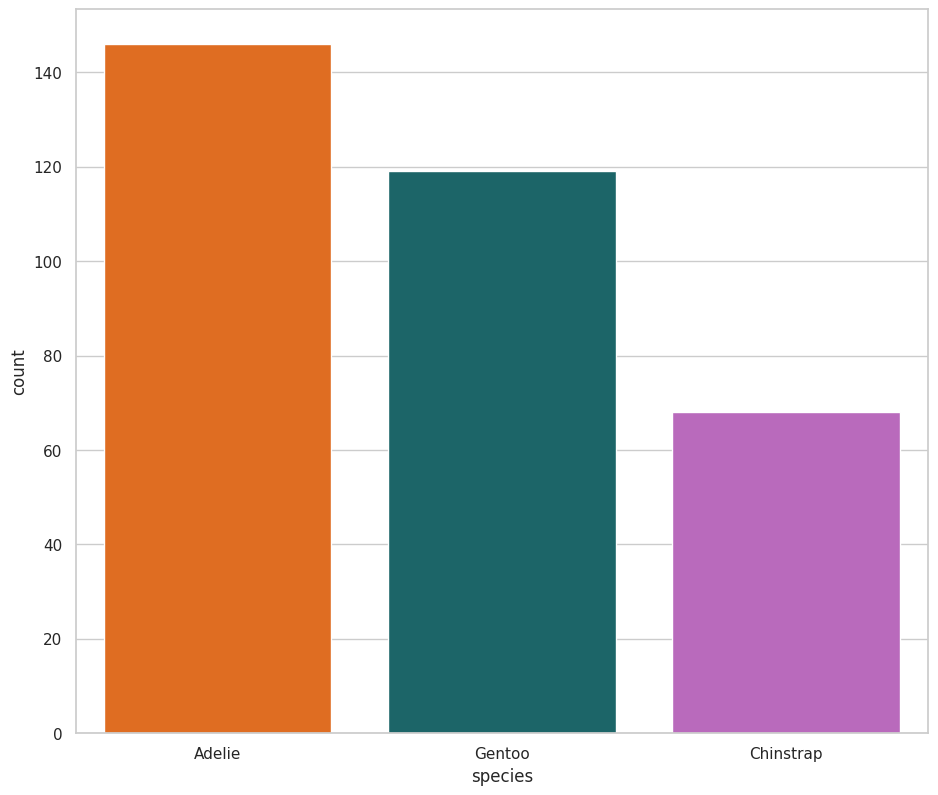

In [21]:
(
    process_penguins
    .value_counts('species',sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data= df,
                x= 'species',
                y='count',
                palette= penguin_color
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

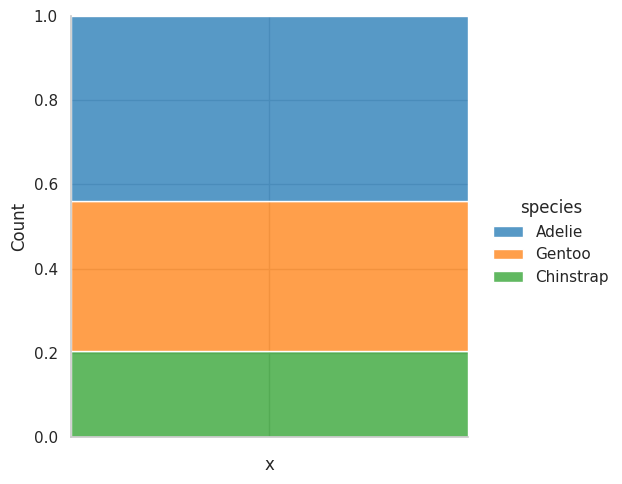

In [22]:
(
    process_penguins
    .assign(x ='')
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill'
            )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [23]:
process_penguins.bill_depth_mm.mean() #altura promedio

17.164864864864867

In [24]:
np.mean(process_penguins.bill_depth_mm) # con numpy

17.164864864864867

In [25]:
process_penguins.mean() #Calcula el promedio para todas las variables numericas

<ipython-input-25-3b7249e281ab>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.mean() #Calcula el promedio para todas las variables numericas


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [26]:
process_penguins.median()

<ipython-input-26-e4511b74093d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [27]:
process_penguins.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


# Medidas de dispersión

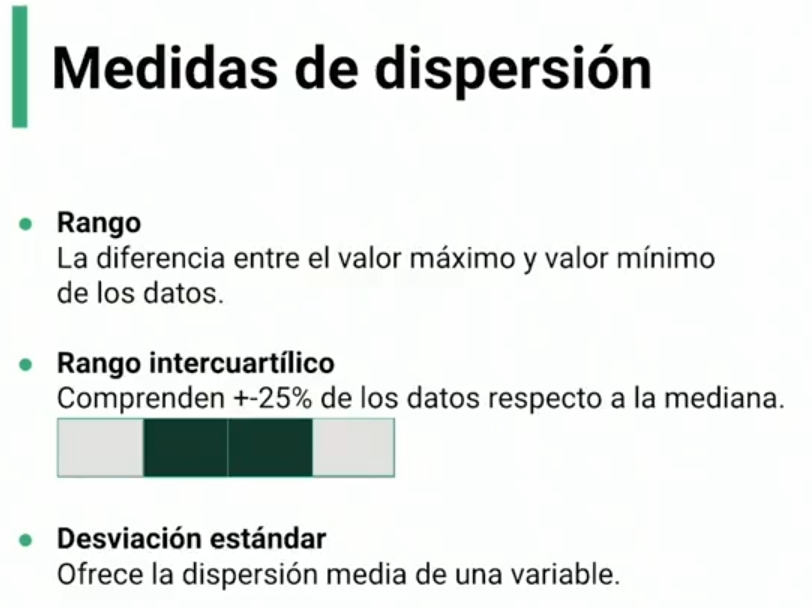

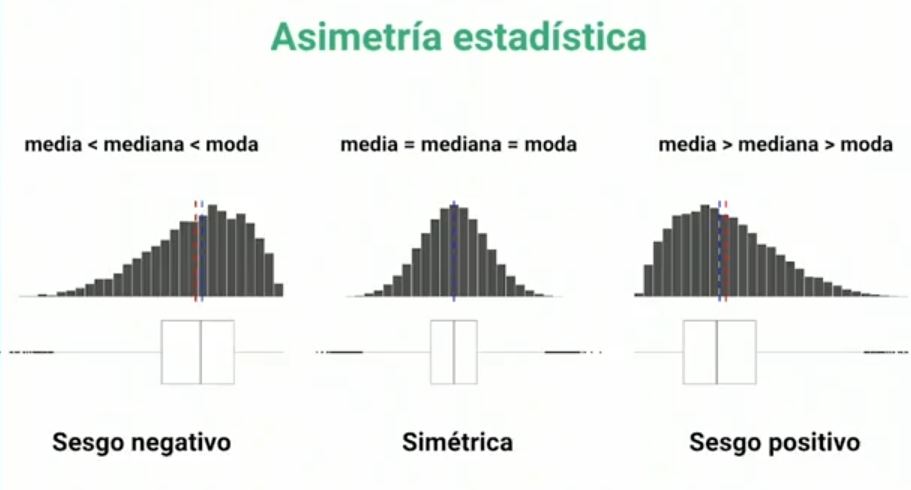

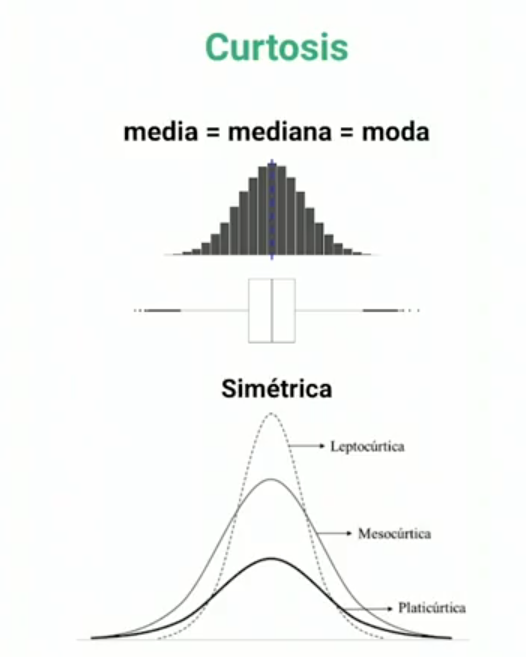

##### Valores:
* Si es = 0 -> mesocurtica
* si es > 0 -> leptocurtica
* se es < 0 -> platicurtica

## ¿Cuál es el valor máximo de las variables?

In [28]:
process_penguins.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [29]:
process_penguins.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [30]:
process_penguins.max(numeric_only=True) - process_penguins.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [31]:
process_penguins.std()

<ipython-input-31-b8d77daad446>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [32]:
process_penguins.quantile(0.75)

<ipython-input-32-b4e25907fa8a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [33]:
process_penguins.quantile(0.25)

<ipython-input-33-1df0bff1056f>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [34]:
process_penguins.quantile(0.75) - process_penguins.quantile(0.25) # Este seria el rango

<ipython-input-34-a1dda8c39c19>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.quantile(0.75) - process_penguins.quantile(0.25) # Este seria el rango


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [35]:
(
    process_penguins.quantile(q=[0.75,0.50,0.25])#Calculo los quantiles
    .transpose() # pivoteo la tabla
    .rename_axis('Variable') # renombro la columna
    .reset_index()
    .assign(iqr=lambda df: df[0.75]-df[0.25]) # agrego una nueva columna con el iqr
)

<ipython-input-35-88f1691062c3>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.quantile(q=[0.75,0.50,0.25])#Calculo los quantiles


,Variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

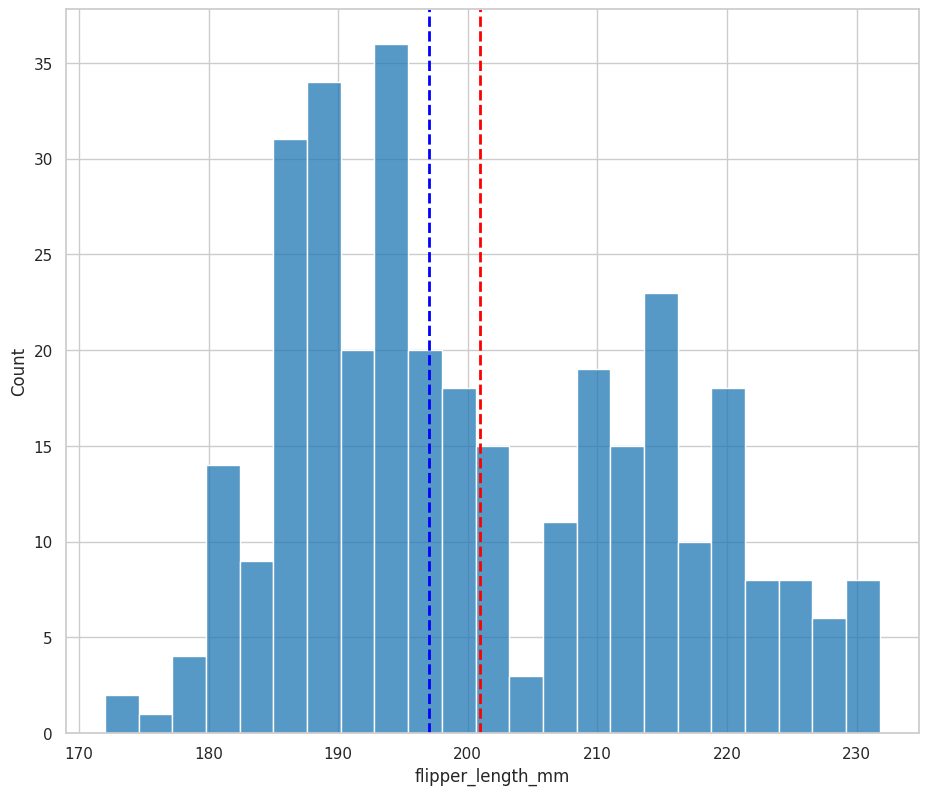

In [36]:
sns.histplot(
    data=process_penguins,
    x='flipper_length_mm',
    binwidth=2.6
)

plt.axvline(
    x=process_penguins.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=process_penguins.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja / boxplot

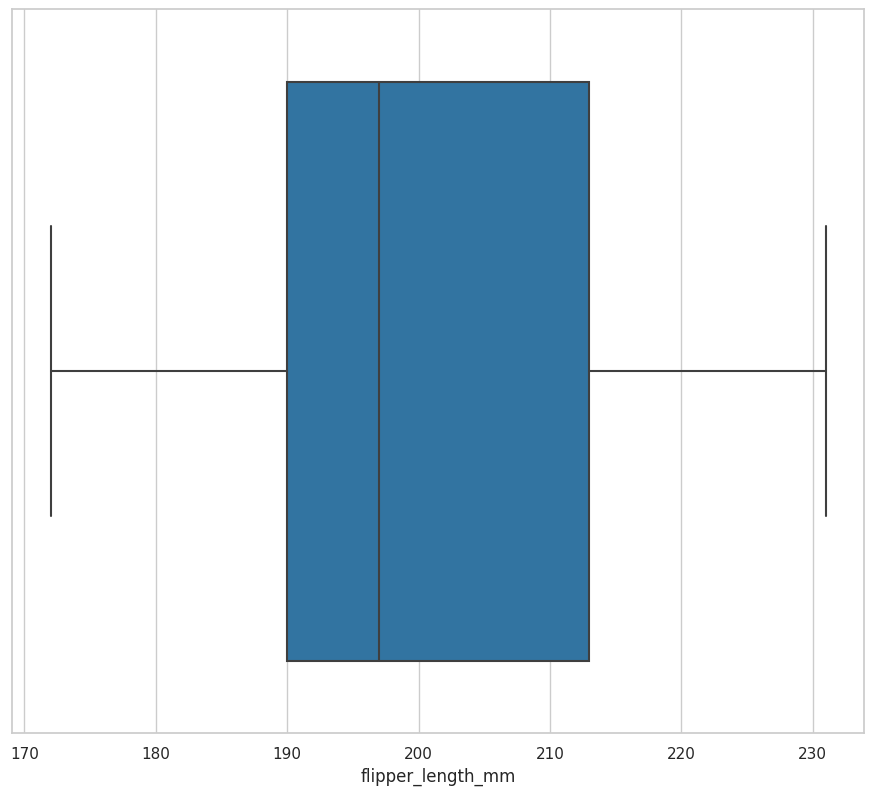

In [37]:
sns.boxplot(
    data=process_penguins,
    x='flipper_length_mm'
)
plt.show()

### Funcion para calcular el tamaño de los bins

In [38]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)
# Esta Funcion ayuda a determinar el numero ideal de bins para el histograma
freedman_diaconis_bindwidth(process_penguins.bill_length_mm)

2.6257697664626938

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

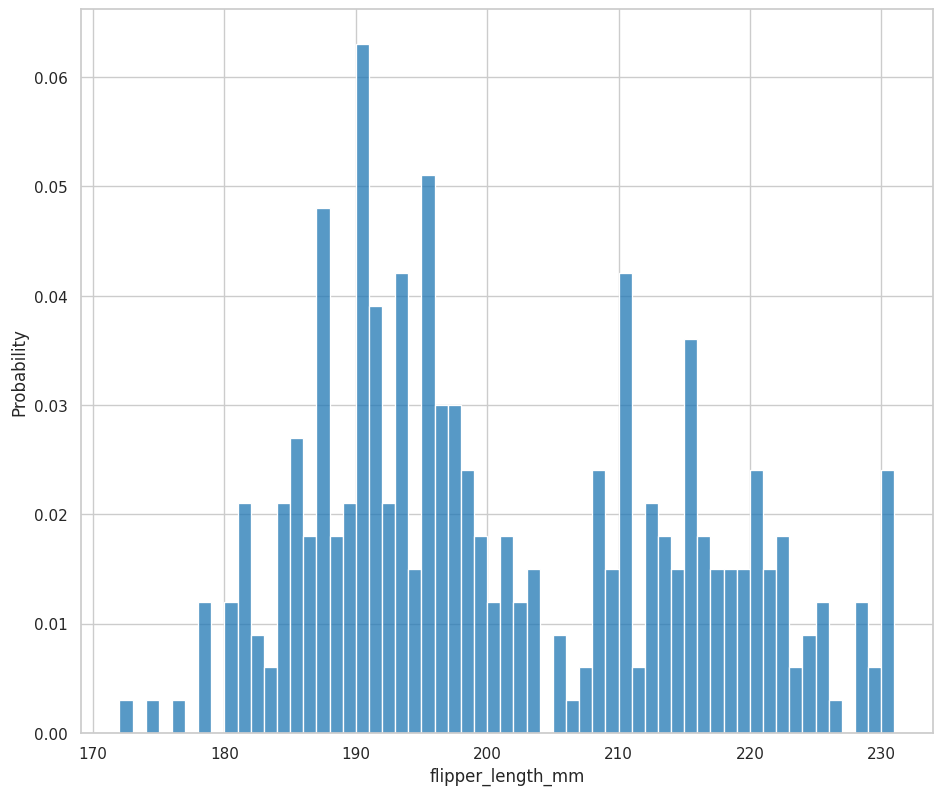

In [39]:
sns.histplot(
    data=process_penguins,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando `empiricaldist`

In [40]:
pip install empiricaldist==0.6.8

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12109 sha256=84e6df30fdf2acdaf137105f22ee0ec326d8219ae295646bad4a878c93c7d4c9
  Stored in directory: /root/.cache/pip/wheels/ba/30/d8/653166652404970cf48ec032ff1e90784bb804739d1834fc01
Successfully built empiricaldist


In [41]:
import empiricaldist

In [42]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(process_penguins.flipper_length_mm)

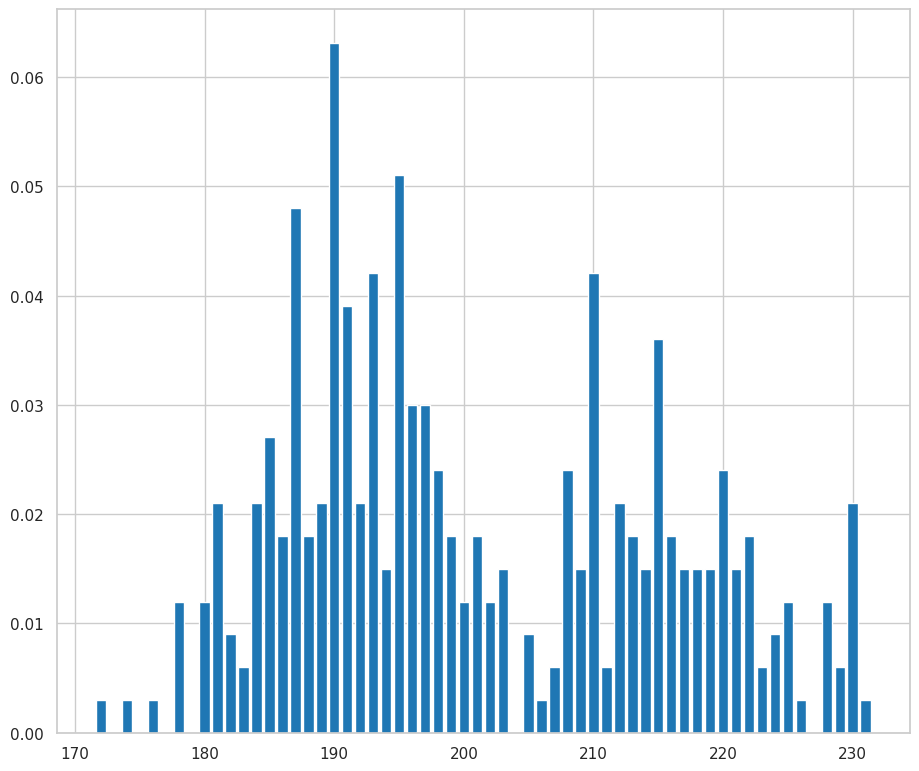

In [43]:
pmf_flipper_length_mm.bar()

In [44]:
pmf_flipper_length_mm(190) # probabilidad de encontrar un pinguino con longitud de ala de 190mm

0.06306306306306306

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

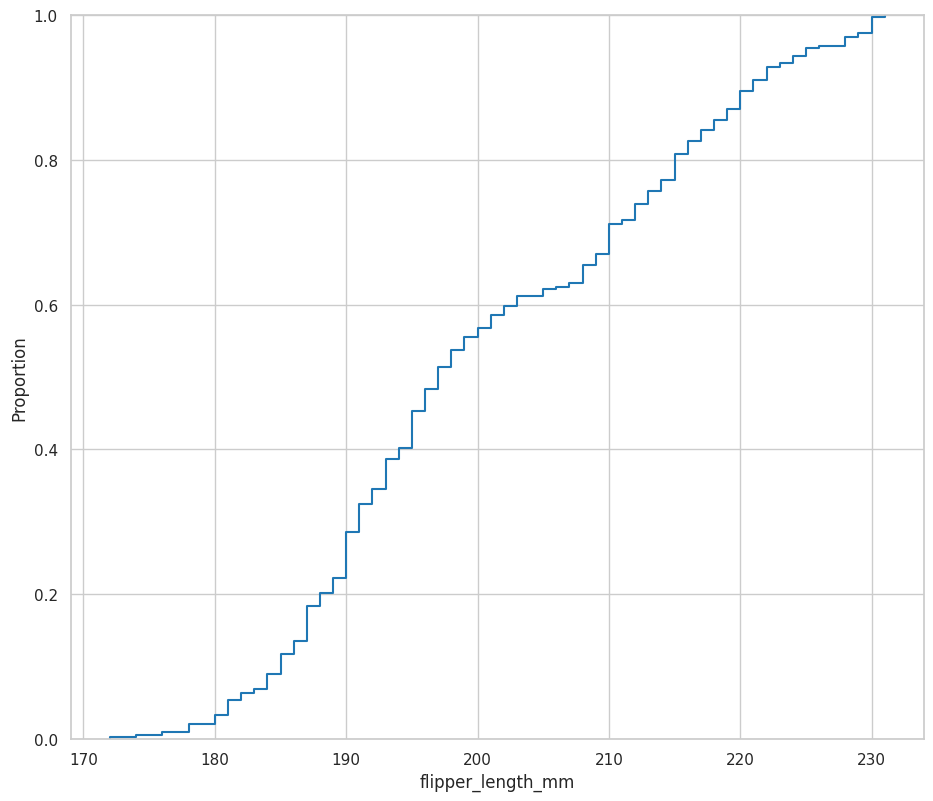

In [45]:
sns.ecdfplot(
    data=process_penguins,
    x=process_penguins.flipper_length_mm
)

### Utilizando `empiricaldist`

In [46]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    process_penguins.flipper_length_mm,
    normalize=True
)

quantity = 200
probability = cdf_flipper_length_mm.forward(quantity)



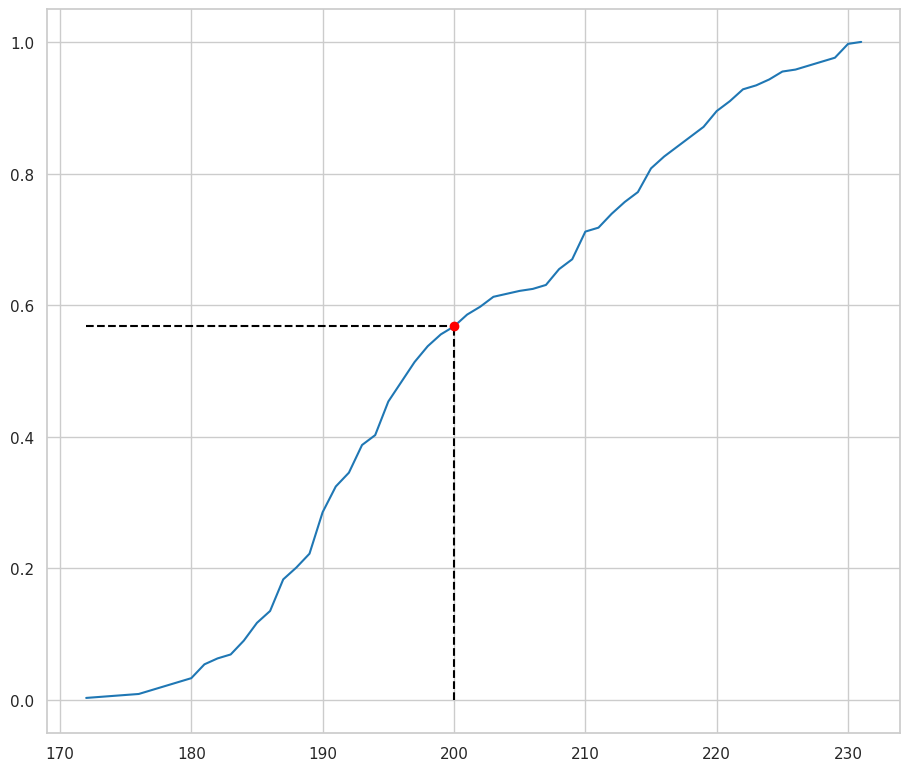

In [47]:
cdf_flipper_length_mm.plot()

quantity = 200
probability = cdf_flipper_length_mm.forward(quantity)

plt.vlines(
    x=quantity,
    ymin=0,
    ymax=probability,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=probability,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=quantity,
    color='black',
    linestyle='dashed'
)

plt.plot(quantity,probability, 'ro')

### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

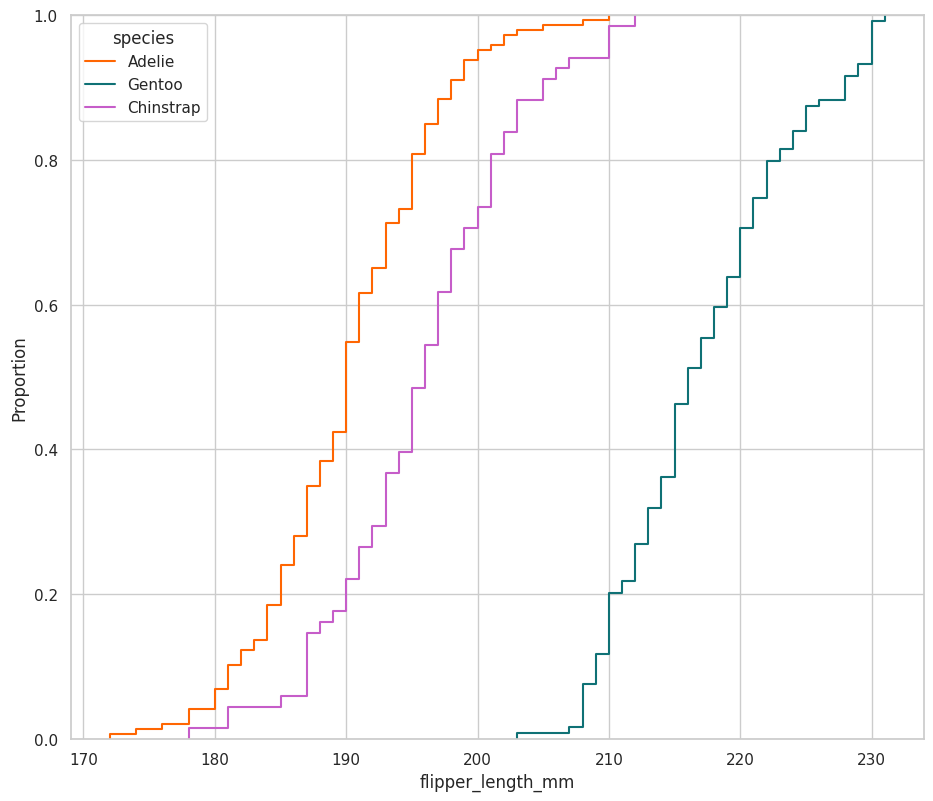

In [48]:
sns.ecdfplot(
    data=process_penguins,
    x=process_penguins.flipper_length_mm,
    hue='species', # Variable que quiero comparar
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

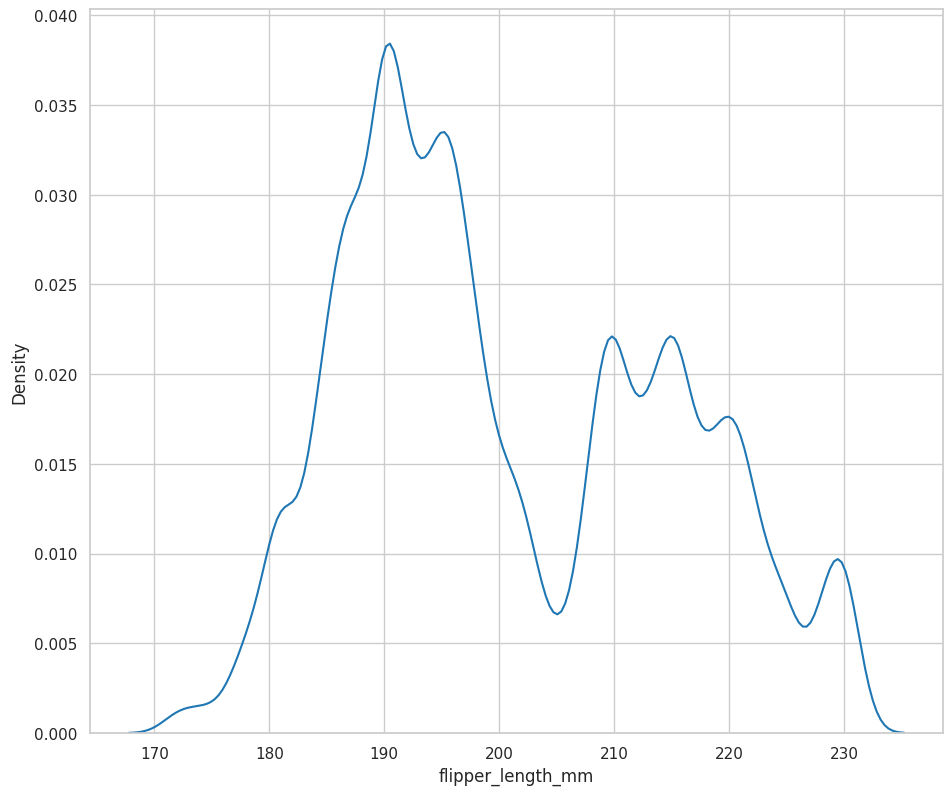

In [49]:
sns.kdeplot(
    data=process_penguins,
    x=process_penguins.flipper_length_mm,
    bw_method=0.1
)

In [50]:
stats = process_penguins.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: >

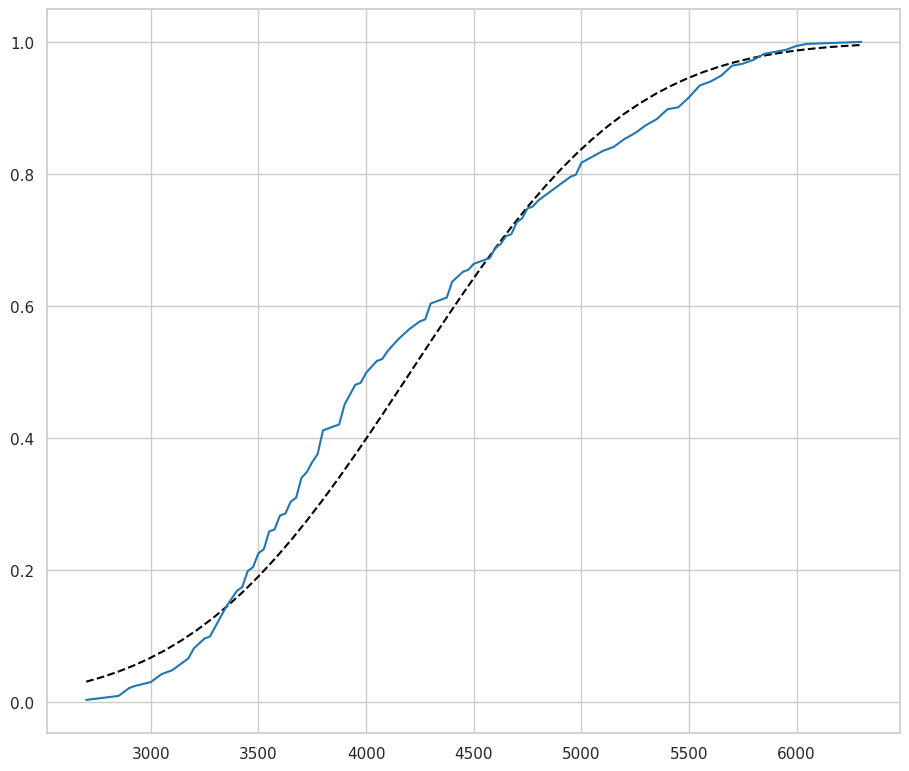

In [51]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    process_penguins.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

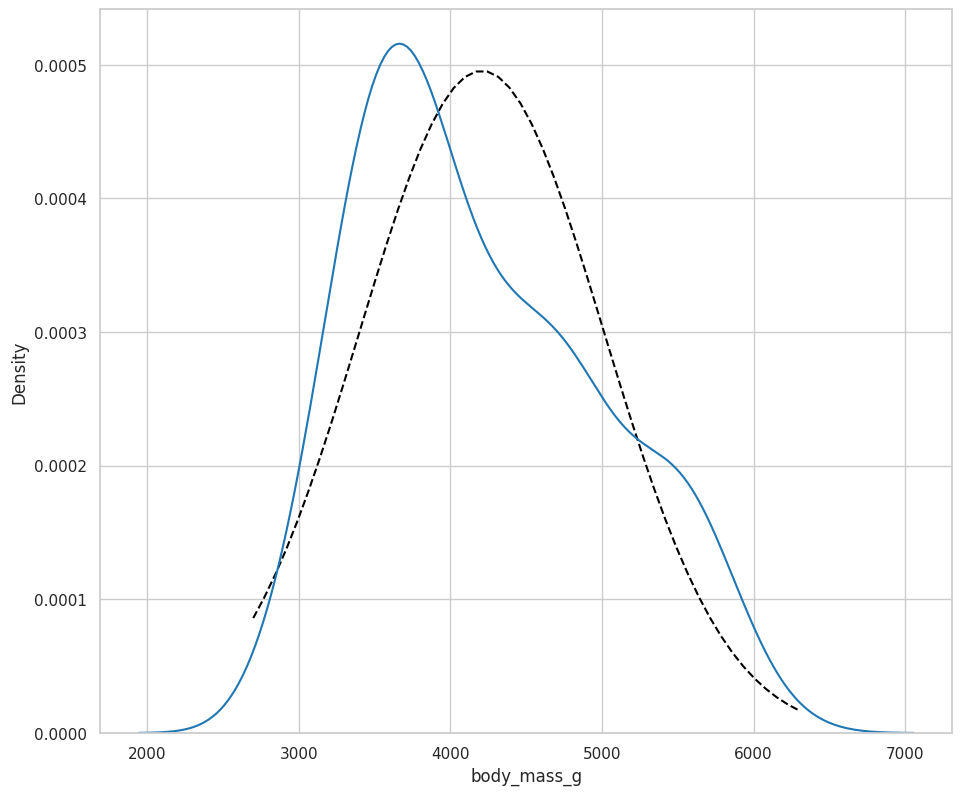

In [52]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=process_penguins,
    x=process_penguins.body_mass_g
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

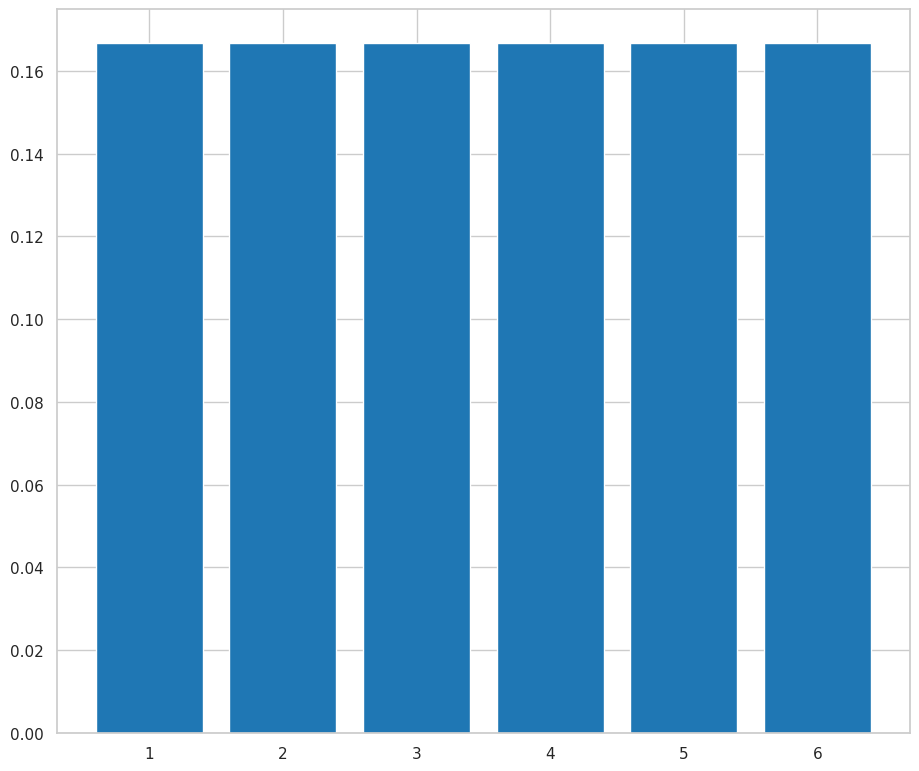

In [53]:
dado = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dado.bar()

In [54]:
for sample_size in(1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dado.sample(sample_size)
    print(values)

[5. 6. 2. 5. 6. 5. 2. 6. 1. 3. 4. 4. 2. 3. 2. 1. 1. 2. 5. 6. 2. 2. 3. 2.
 5. 2. 6. 4. 6. 5. 5. 2. 1. 4. 3. 5. 2. 4. 3. 6. 3. 5. 4. 4. 4. 3. 3. 2.
 1. 6. 3. 2. 1. 2. 4. 5. 5. 4. 4. 2. 1. 1. 6. 6. 1. 2. 6. 5. 3. 2. 2. 6.
 3. 6. 2. 4. 4. 5. 1. 1. 1. 5. 3. 1. 1. 1. 1. 2. 4. 1. 1. 3. 2. 1. 6. 2.
 5. 3. 2. 5.]
[5. 2. 3. 1. 6. 1. 4. 6. 4. 5. 2. 6. 4. 6. 4. 6. 3. 2. 6. 3. 4. 6. 1. 2.
 1. 4. 1. 4. 5. 5. 2. 1. 4. 5. 1. 6. 5. 6. 5. 6. 5. 5. 1. 4. 2. 2. 1. 6.
 4. 1. 5. 3. 6. 5. 1. 1. 2. 1. 2. 3. 6. 3. 5. 4. 2. 2. 6. 1. 6. 1. 4. 2.
 2. 1. 3. 3. 5. 3. 4. 6. 3. 3. 6. 6. 2. 6. 1. 6. 4. 5. 4. 2. 3. 2. 3. 5.
 1. 3. 4. 3. 3. 5. 1. 1. 5. 6. 6. 2. 3. 6. 1. 6. 3. 3. 6. 2. 1. 2. 4. 6.
 5. 2. 2. 5. 6. 1. 4. 5. 6. 1. 1. 6. 4. 6. 5. 4. 2. 5. 5. 2. 3. 4. 2. 5.
 4. 1. 3. 2. 4. 2. 5. 6. 6. 6. 5. 4. 2. 6. 5. 3. 2. 6. 6. 5. 6. 1. 1. 4.
 5. 6. 6. 6. 3. 5. 5. 6. 3. 6. 6. 4. 6. 5. 3. 2. 6. 3. 2. 1. 1. 6. 2. 5.
 3. 2. 4. 6. 1. 6. 2. 6. 5. 3. 3. 4. 5. 2. 5. 5. 1. 1. 5. 1. 1. 1. 4. 3.
 5. 1. 5. 1. 6. 3. 6. 6. 5. 1. 4. 1. 

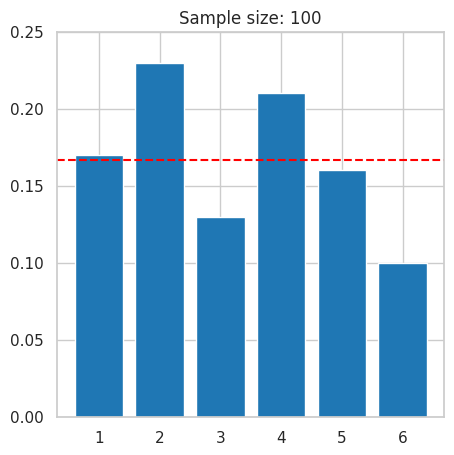

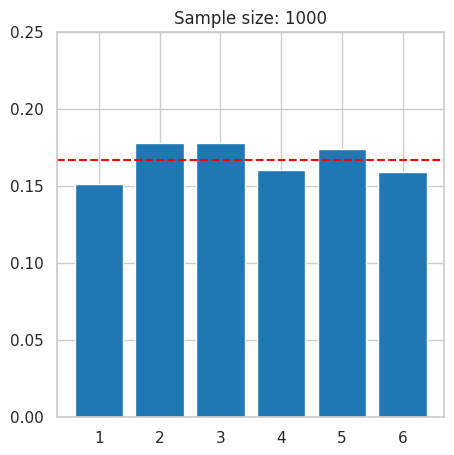

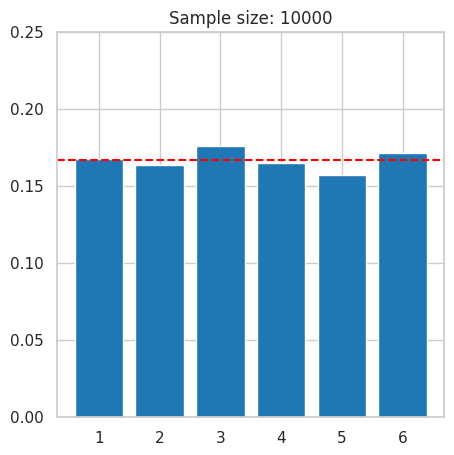

In [55]:
for sample_size in(1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dado.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim(0,0.25)
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

In [56]:
process_penguins.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [57]:
sex_numeric = process_penguins.sex.replace(['male', 'female'], [1,0])

In [58]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

<ipython-input-58-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
<ipython-input-58-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
<ipython-input-58-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Estimated percentage of male penguins in population is: 50.1829%


<ipython-input-58-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
<ipython-input-58-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
<ipython-input-58-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

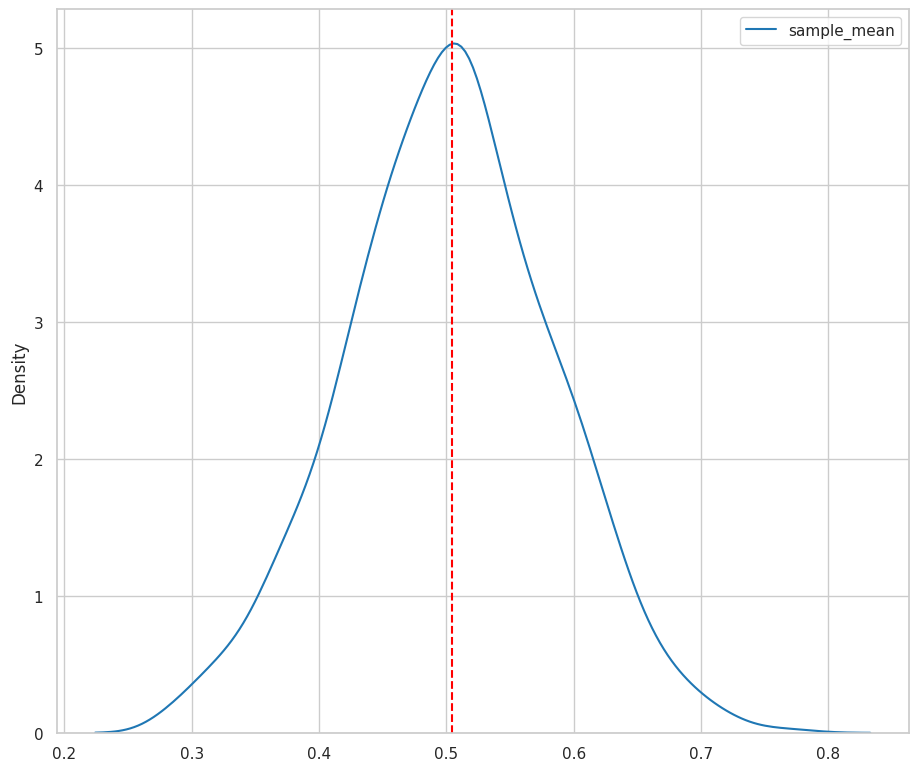

In [59]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [60]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

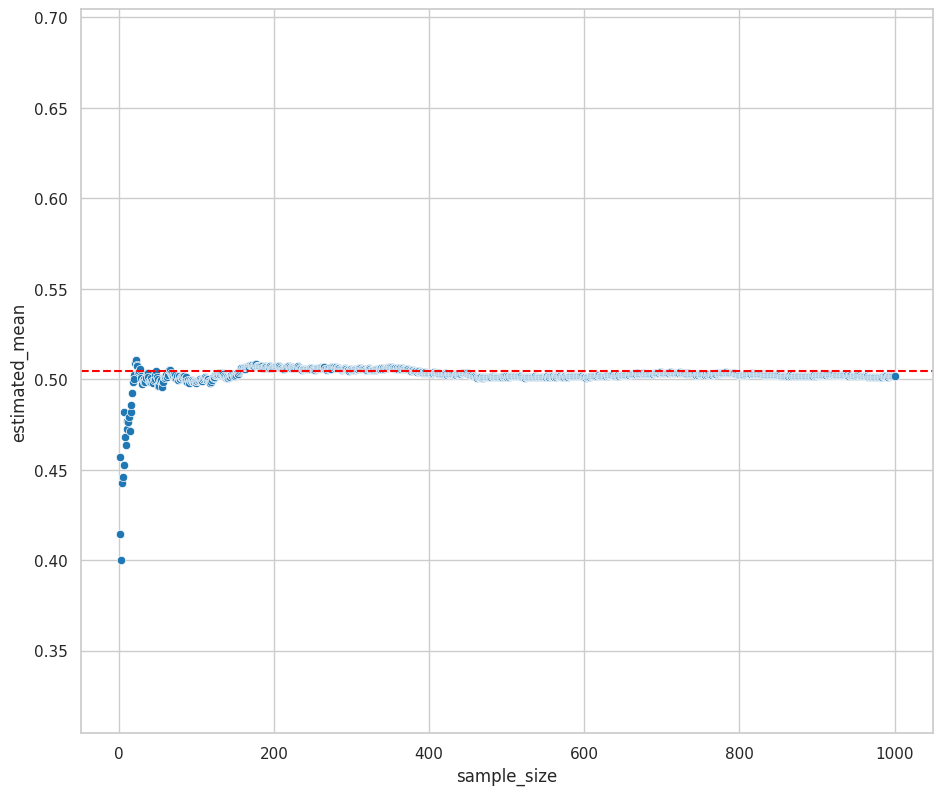

In [61]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

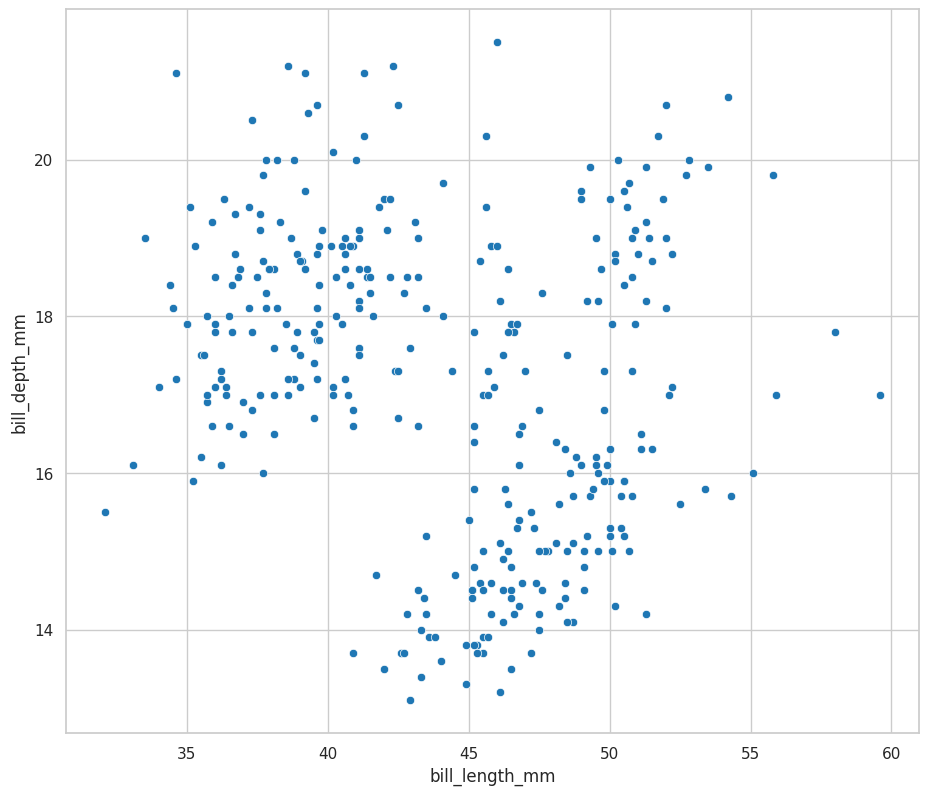

In [62]:
sns.scatterplot(
    data=process_penguins,
    x= process_penguins.bill_length_mm,
    y= process_penguins.bill_depth_mm
)

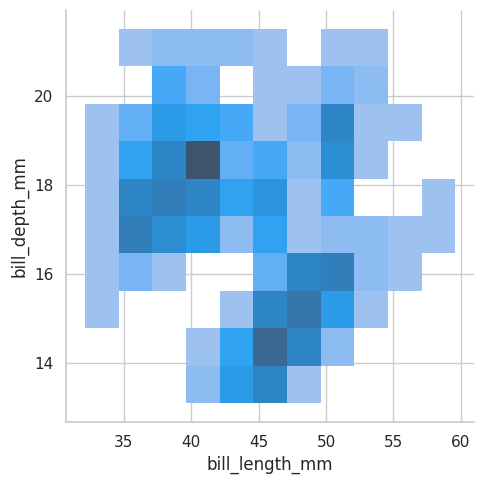

In [63]:
sns.displot(
    data= process_penguins,
    x= process_penguins.bill_length_mm,
    y= process_penguins.bill_depth_mm
)

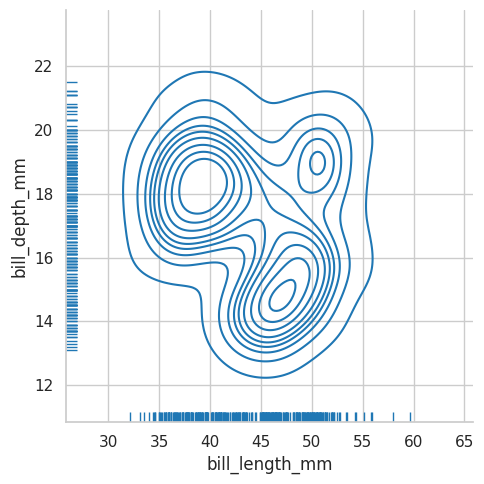

In [64]:
sns.displot(
    data= process_penguins,
    x= process_penguins.bill_length_mm,
    y= process_penguins.bill_depth_mm,
    rug= True,
    kind= 'kde'
)

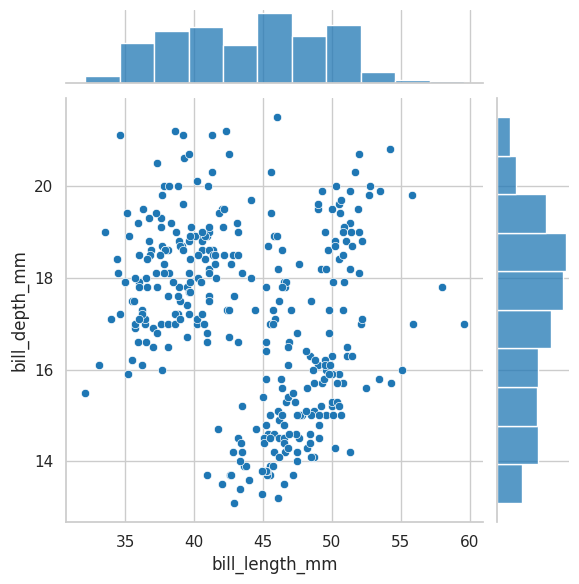

In [65]:
sns.jointplot(
    data= process_penguins,
    x= process_penguins.bill_length_mm,
    y= process_penguins.bill_depth_mm
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

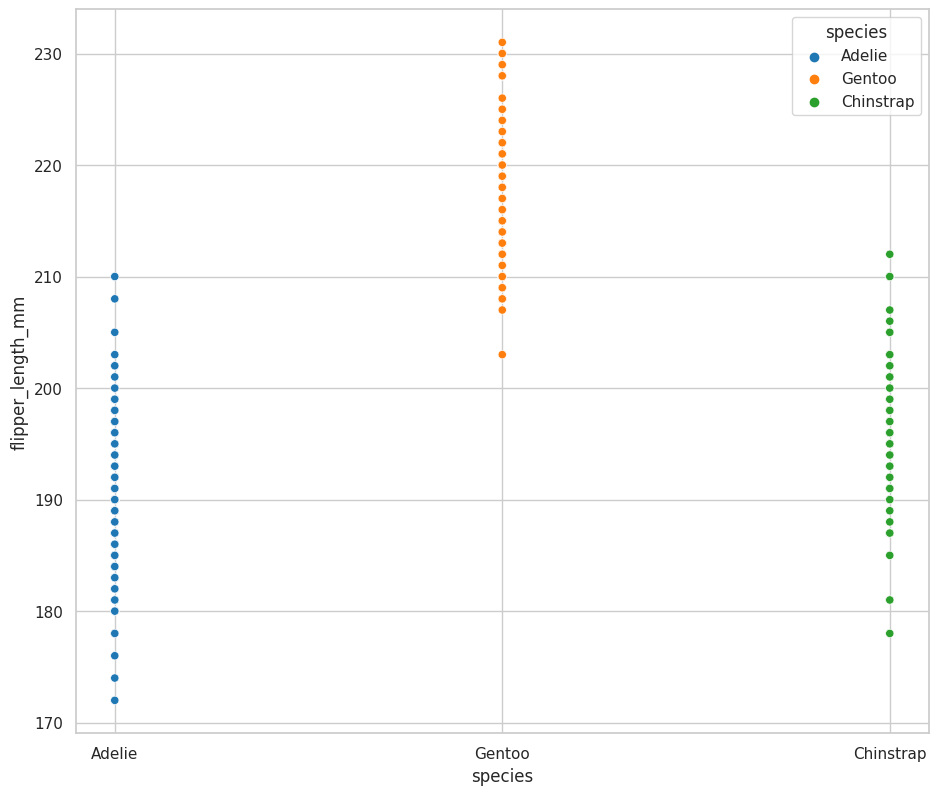

In [66]:
sns.scatterplot(
    data = process_penguins,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

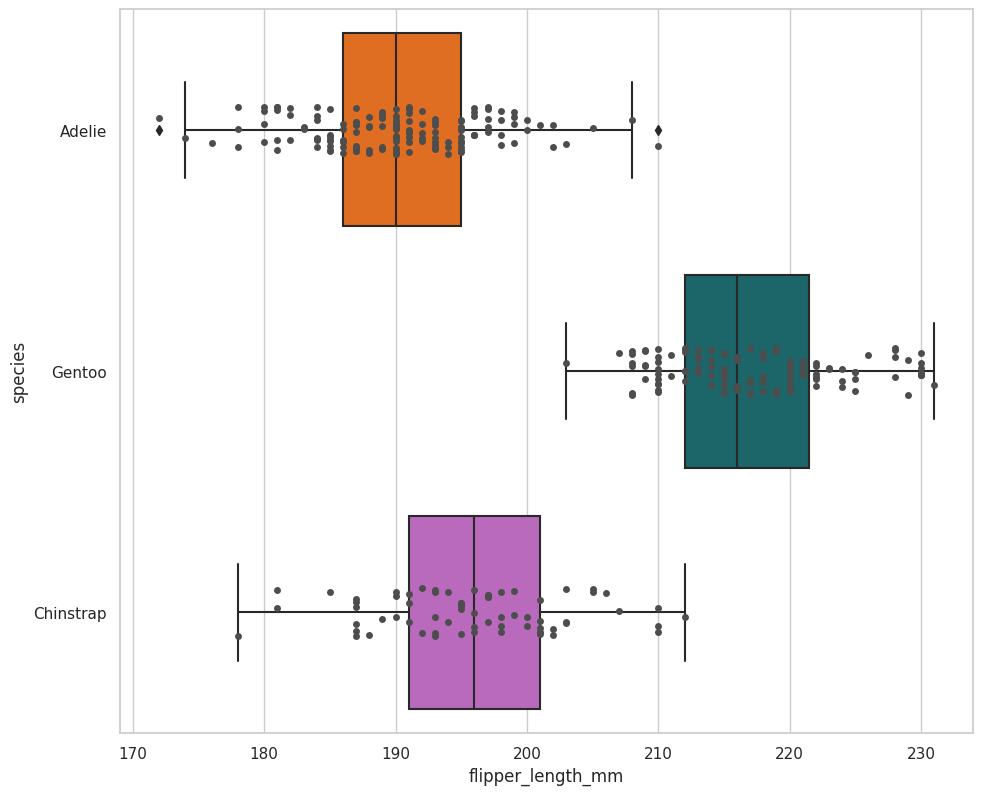

In [67]:
ax= sns.boxplot(
    data=process_penguins,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

ax= sns.stripplot(
    data=process_penguins,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

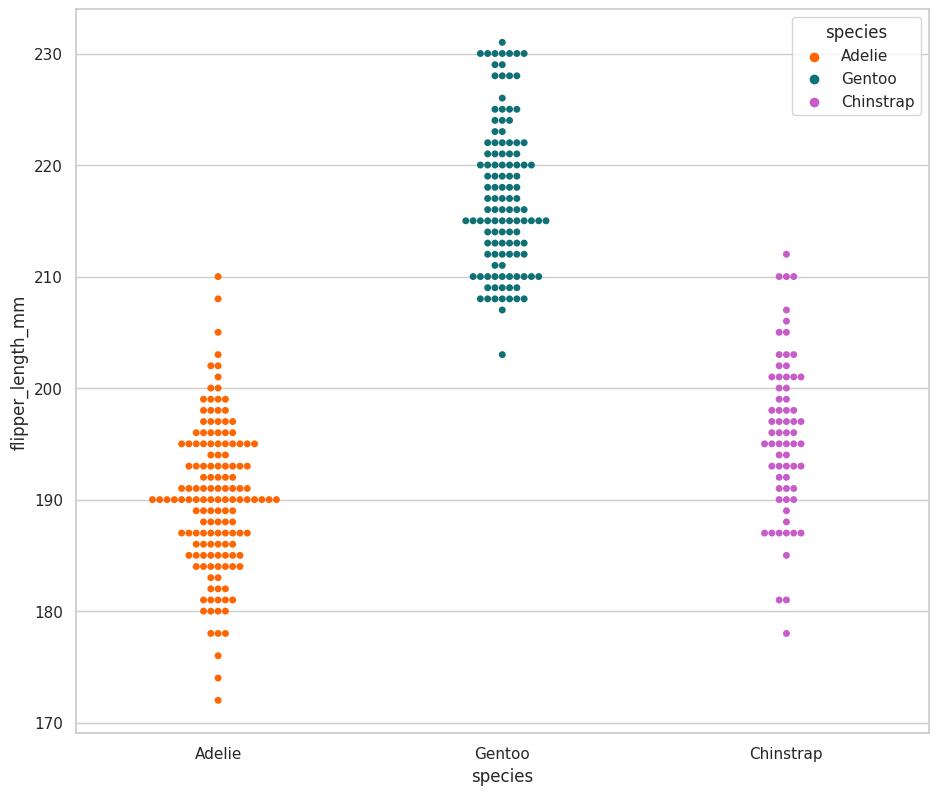

In [68]:
sns.swarmplot(
    data=process_penguins,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [69]:
process_penguins.corr()

<ipython-input-69-b6a8f3a1ed00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


## ¿Cómo puedo visualizar los coeficientes de correlación?

<ipython-input-70-a35d4ac049de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=process_penguins.corr(),


<Axes: >

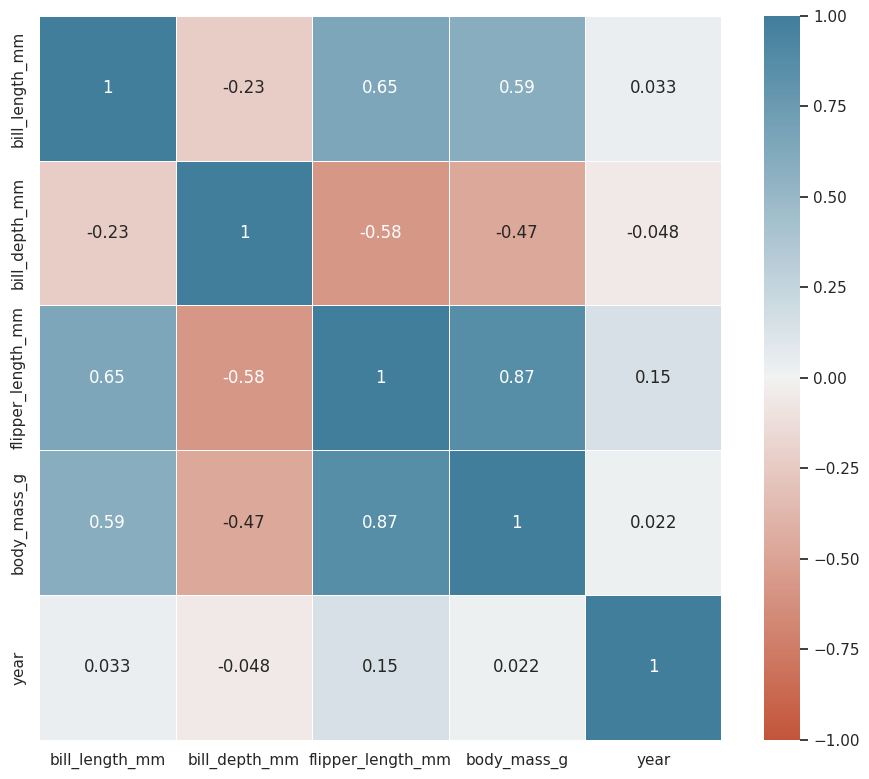

In [70]:
sns.heatmap(
    data=process_penguins.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1, #valor minimo
    vmax=1, #valor maximo
    linewidths=0.5,
    annot=True # escribe los valores
)

<ipython-input-71-07f4599a66b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=process_penguins.corr(),


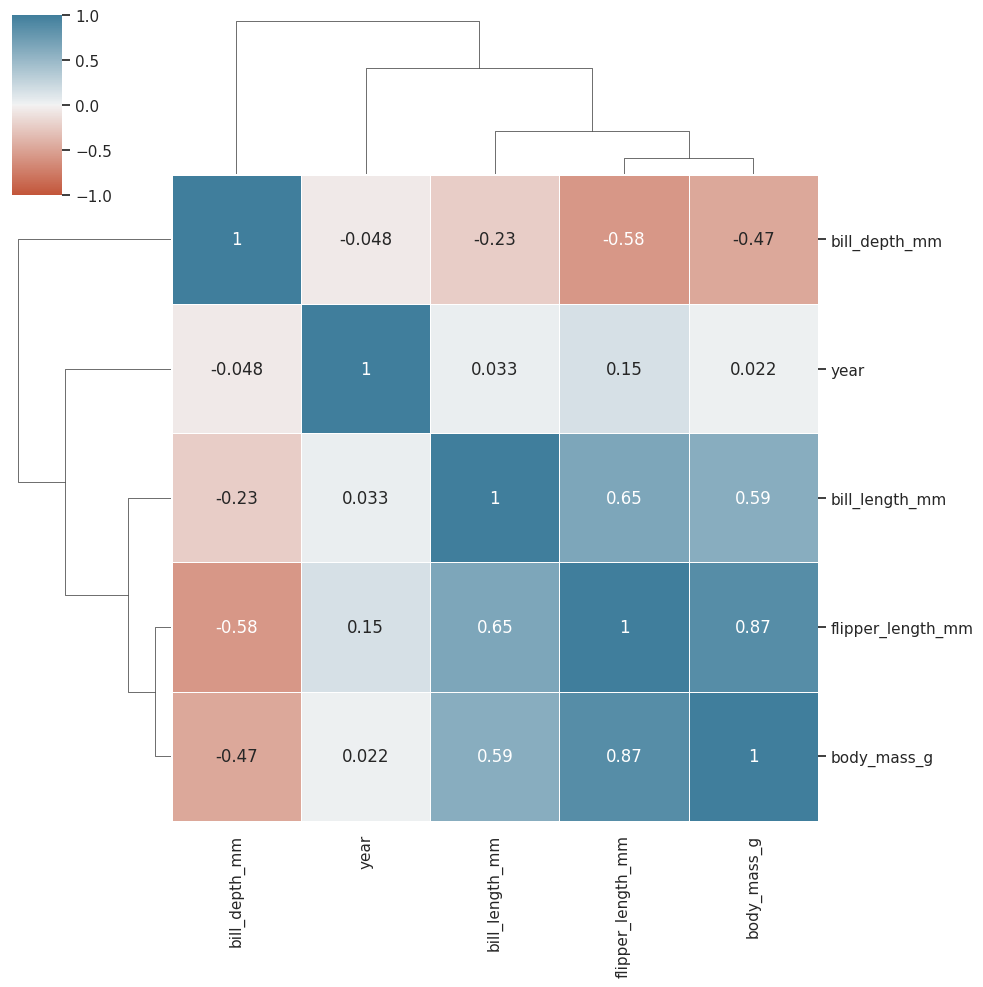

In [71]:
sns.clustermap(
    data=process_penguins.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1, #valor minimo
    vmax=1, #valor maximo
    linewidths=0.5,
    annot=True # escribe los valores
)

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [72]:
#Agregamos a el data set una variable numerica que convierte el masculino y femenino en 1 o 0
process_penguins =(
    process_penguins.assign(
        numeric_sex=lambda df: df.sex.replace(['female','male'],[0,1])
    )
)

<ipython-input-73-07f4599a66b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=process_penguins.corr(),


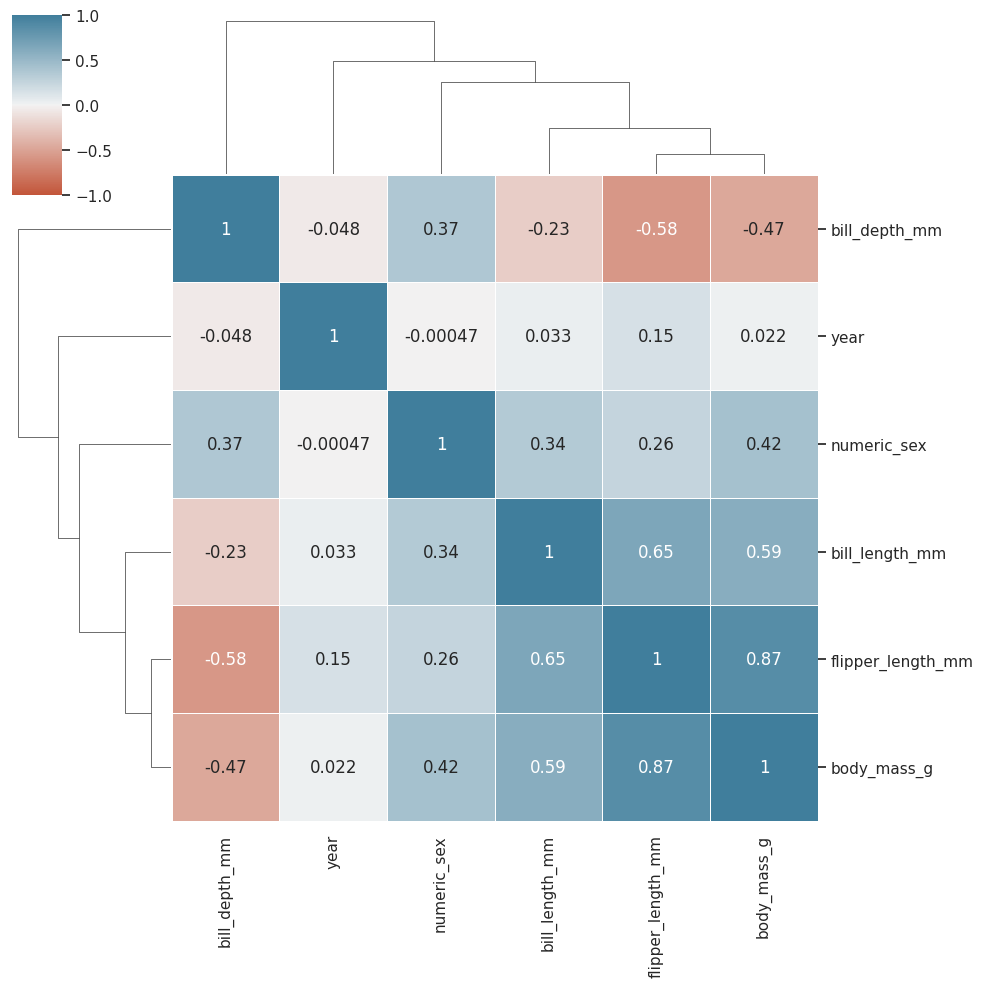

In [73]:
sns.clustermap(
    data=process_penguins.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1, #valor minimo
    vmax=1, #valor maximo
    linewidths=0.5,
    annot=True # escribe los valores
)

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


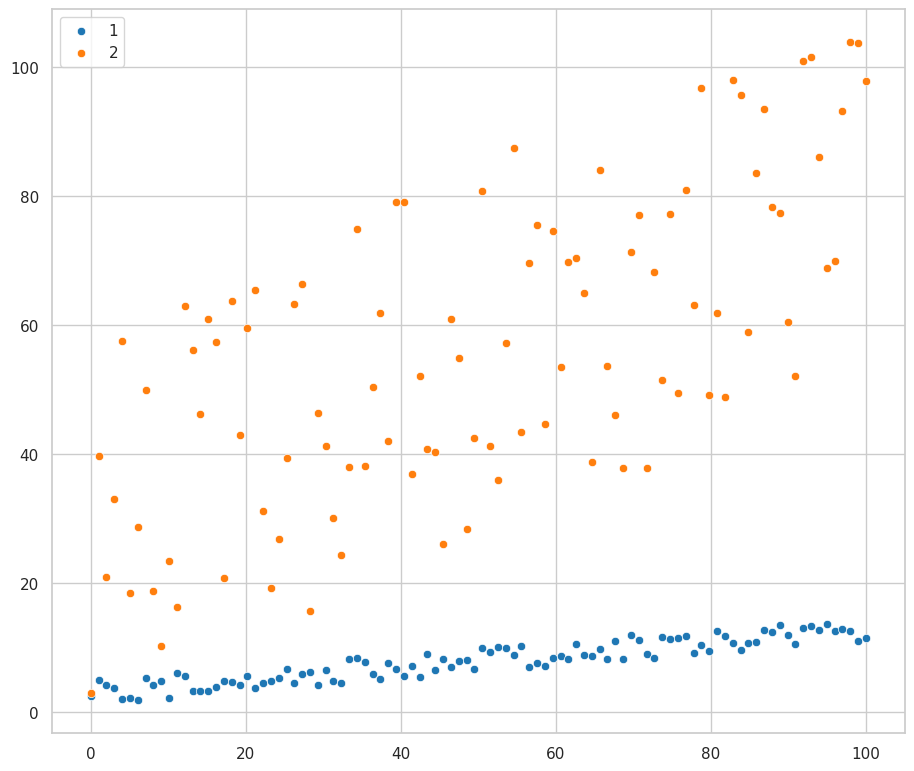

In [74]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

In [75]:
res_1 = scipy.stats.linregress(x=x1, y=y1)
res_2 = scipy.stats.linregress(x=x2, y=y2)

print(res_1,res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


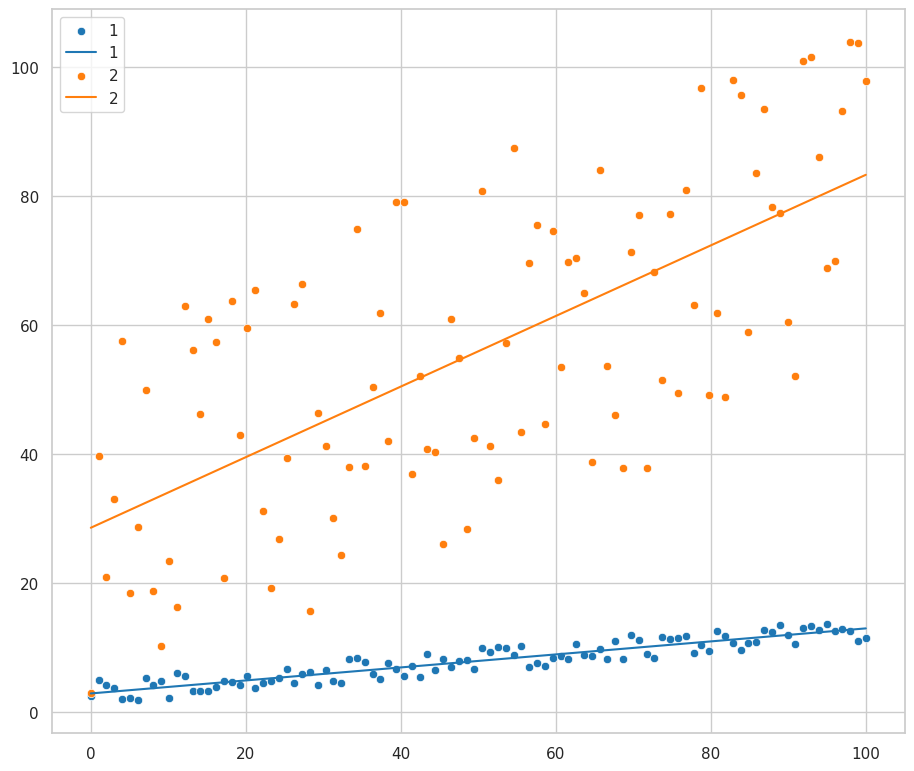

In [76]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = res_1.intercept + res_1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = res_2.intercept + res_2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


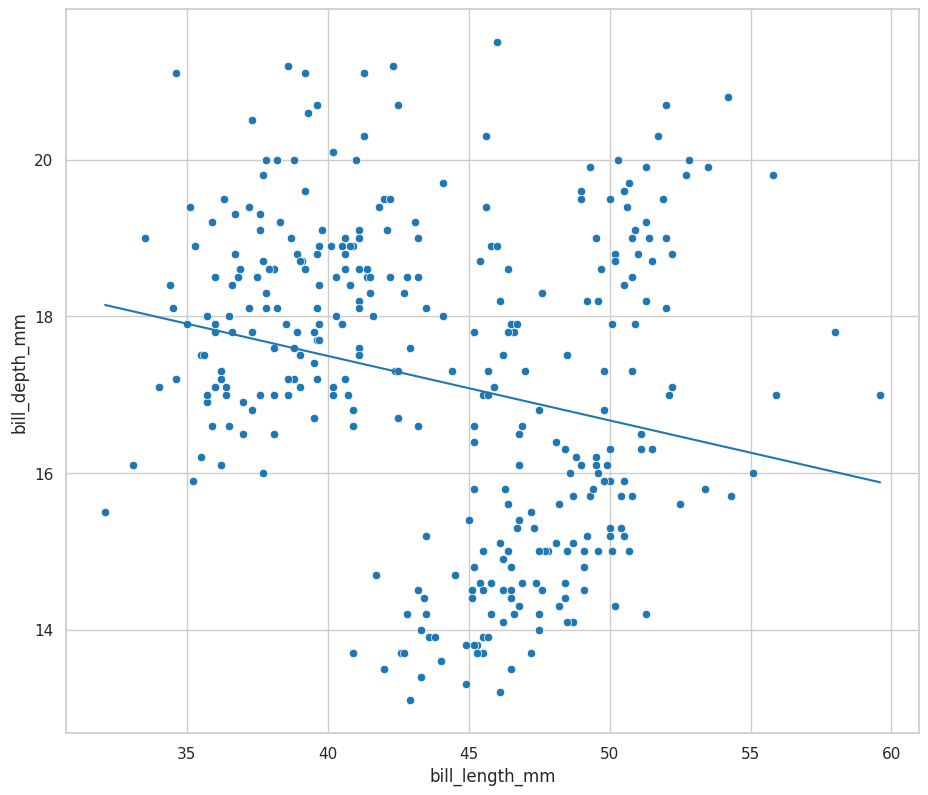

In [77]:
sns.scatterplot(
    data=process_penguins,
    x='bill_length_mm',
    y='bill_depth_mm')

res_penguin = scipy.stats.linregress(
    x=process_penguins.bill_length_mm,
    y=process_penguins.bill_depth_mm
)

print(res_penguin)

fx1 = np.array([process_penguins.bill_length_mm.min(), process_penguins.bill_length_mm.max()])
fy1 = res_penguin.intercept + res_penguin.slope * fx1

plt.plot(fx1,fy1)

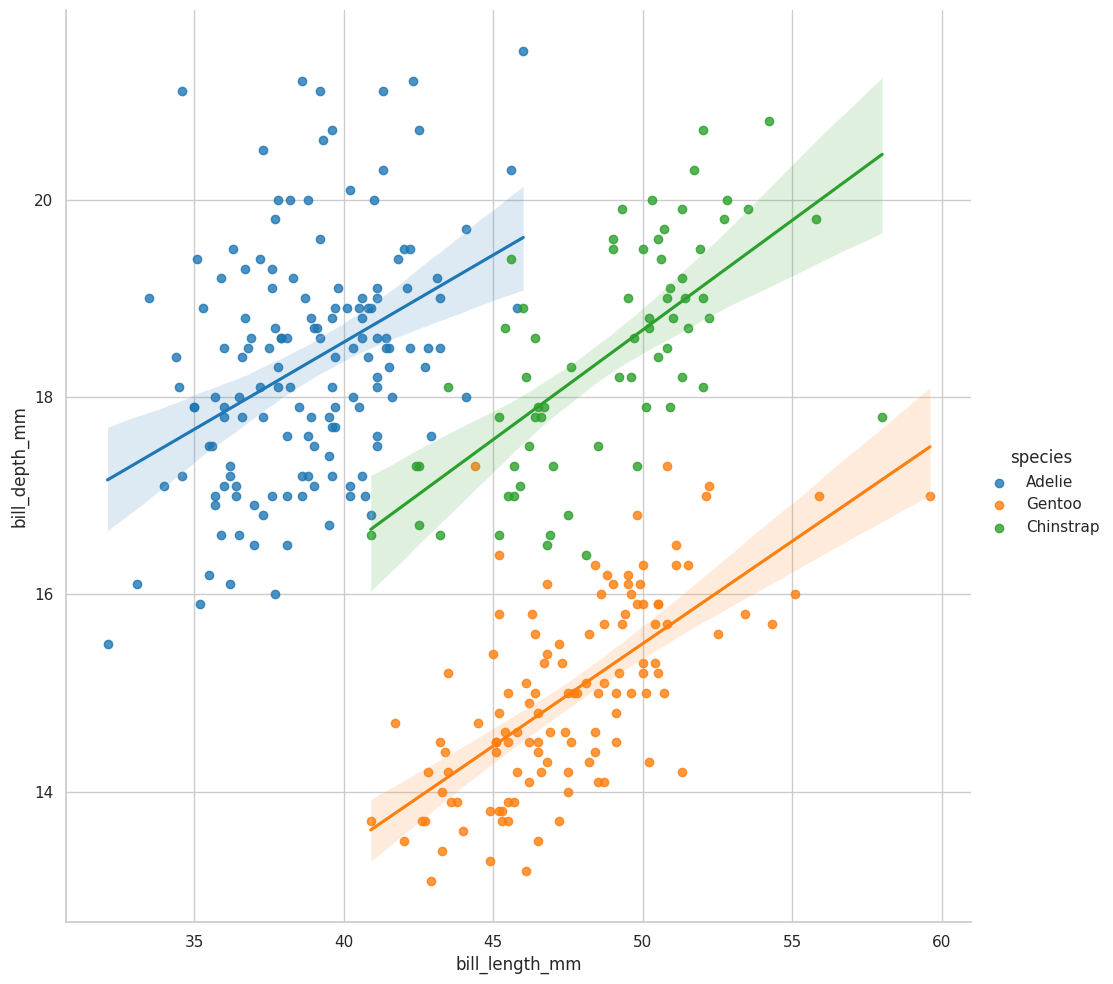

In [78]:
sns.lmplot(
    data=process_penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

### Creando modelos

#### Modelo 1

In [79]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=process_penguins
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.54e-32
Time:                        03:11:37   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [80]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=process_penguins
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.04e-46
Time:                        03:11:40   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [81]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=process_penguins
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          9.26e-103
Time:                        03:11:43   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [82]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=process_penguins
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          6.28e-122
Time:                        03:11:46   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [83]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=process_penguins
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.53e-118
Time:                        03:11:49   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Paradoja de Simpson

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

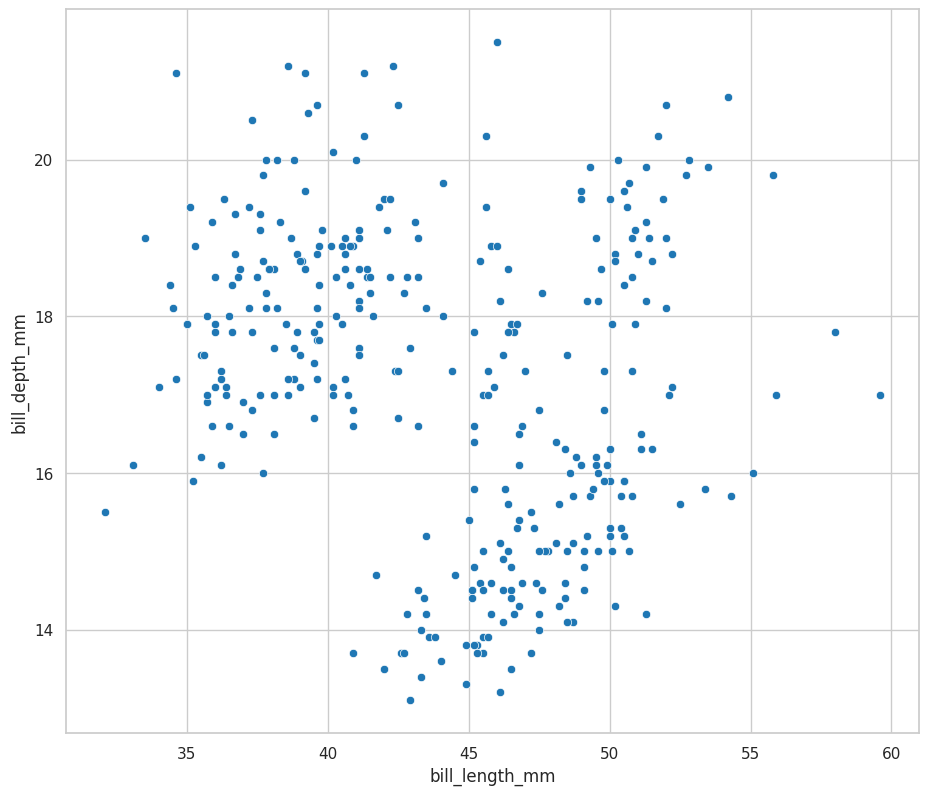

In [85]:
# Esto es lo que sabiamos en un inicio
sns.scatterplot(
    data=process_penguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

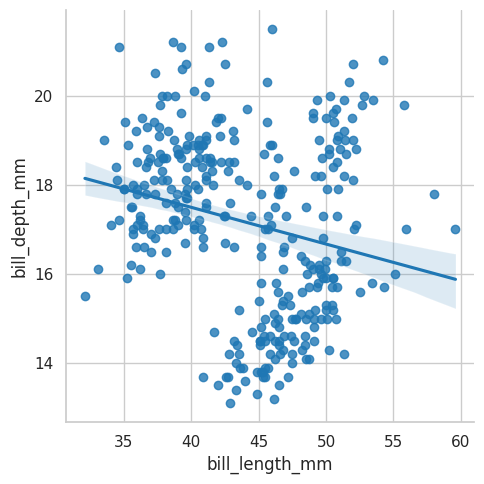

In [86]:
# Despues aprendimos a calcular la regresion lineal simple
sns.lmplot(
    data=process_penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
)

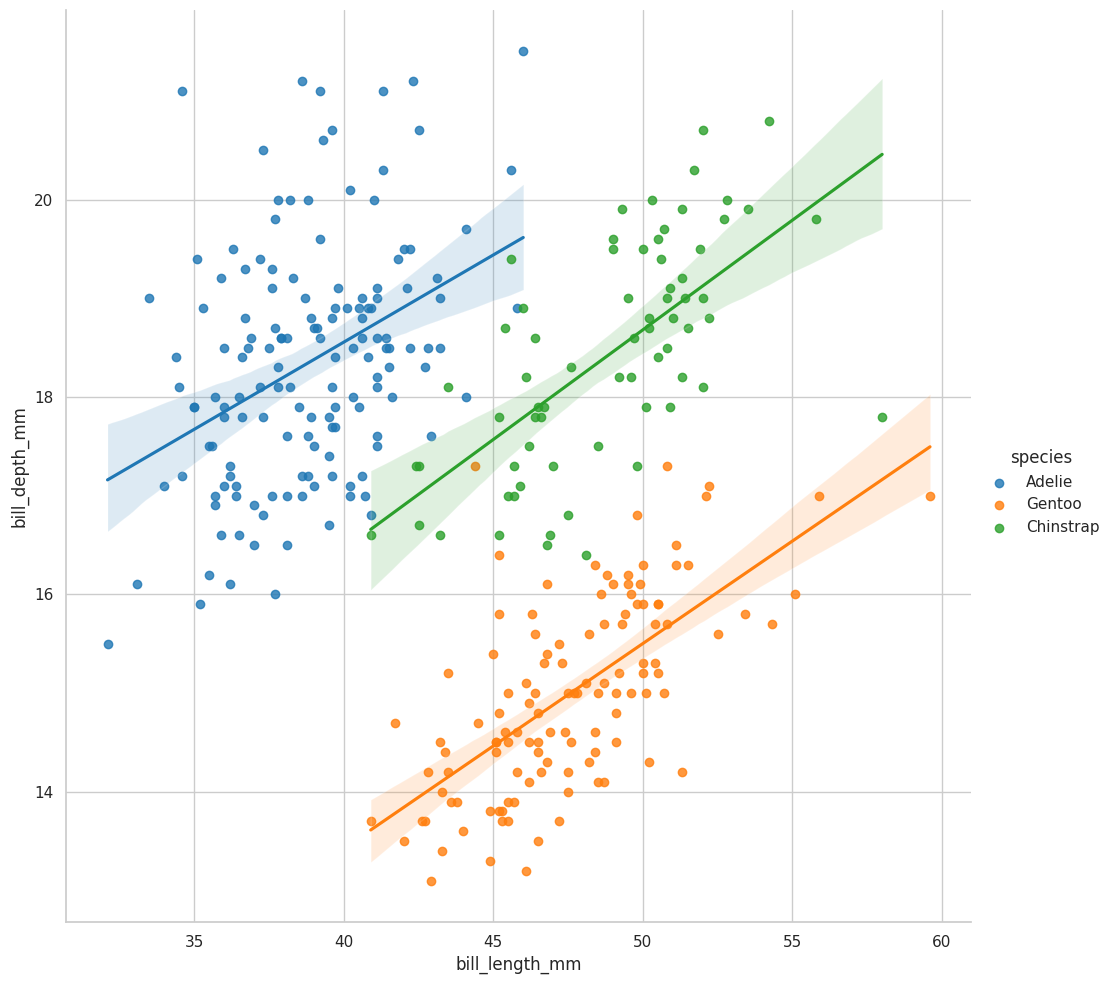

In [87]:
# Despues solo agragando la vairiable especie tuvimos otro tipo de relacion, paso de ser negativa a positiva.
sns.lmplot(
    data=process_penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

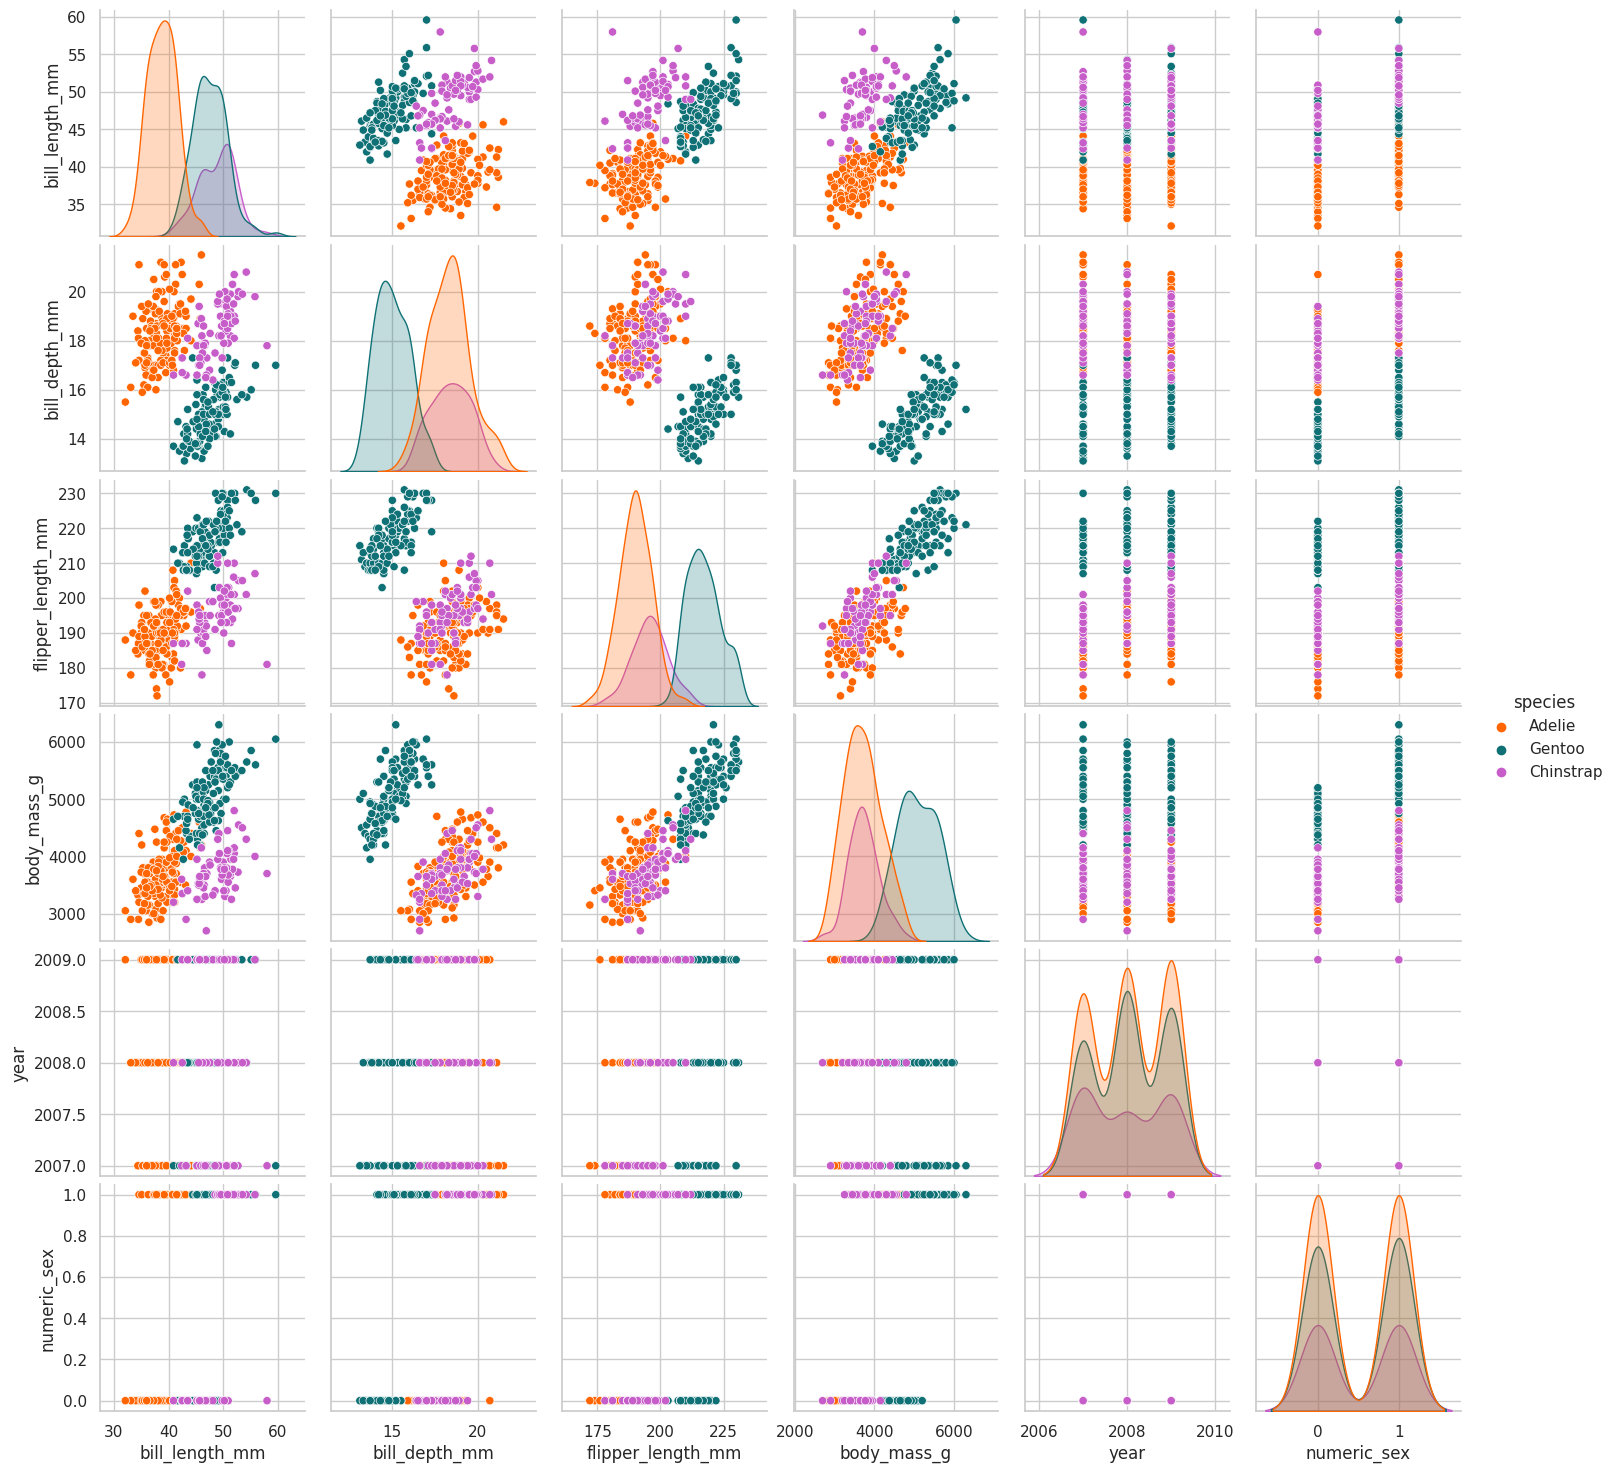

In [88]:
sns.pairplot(
    data=process_penguins,
    hue='species',
    palette=penguin_color
)